# Exercices Astropy

Les modules Astropy suivants seront, pour la plupart très partiellement, utilisés dans ces exercices :
  - `astropy.constants` : constants useful in Astronomy
  - `astropy.units` : everything related to physical quantities
  - `astropy.table` : store and manipulate heterogeneous tables
  - `astropy.coordinates` : celestial/spatial coordinates, tools for converting between common coordinate systems
  - `astropy.wcs` : WCS transformations in FITS files
  - `astropy.io.fits` : access to FITS files
  - `astropy.io.misc` : IO routines (HDF5, YAML, pickle)

Le fichier `HDF5` suivant, téléchargeable en ligne, contient plusieurs catalogues de données CFHT réduites par le stack LSST.

        https://github.com/nicolaschotard/lsst_drp_analysis/blob/master/python/testdata.hdf5?raw=true
        
1. Téléchargez-le ([doc](http://docs.astropy.org/en/stable/utils/)) ou récupérez-le directement [sur github](https://github.com/nicolaschotard/lsst_drp_analysis/blob/master/python/testdata.hdf5)
2. Ce fichier hdf5 contient un catalogue dont le `path` (nom de la clé dans le langage HDF5) est `deepCoadd_forced_src` ([doc](http://docs.astropy.org/en/v0.2.1/table/io.html)). Chargez-le et créer une table `astropy`.
3. Visualiser le contenue de la table, afficher le nombre de colonnes et le nombre de lignes, chaque ligne correspondant à une galaxies.
4. Dans ce catalogue, les magnitudes sont définies par la clé `modelfit_CModel_mag`, et les filtres du CFHT par la clé `filter`. Afficher dans une unique figure les distributions des magnitudes pour les 2 filtres du CFHT disponible ici(u, et i). Attention, certaines magnitudes ont pour valeur des NaN (Not a Number), et devront tout d'abord être filtrées (voir `np.isfinite`).
5. Refaire

In [5]:
# Initialisation de matplotlib et numpy
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# 1. Téléchargement du fichier de données
from astropy.utils.data import download_file
f = 'https://github.com/nicolaschotard/lsst_drp_analysis/blob/master/python/testdata.hdf5?raw=true'
mon_fichier = download_file(f)

In [8]:
# 2. Chargemment du catalogue dans une table astropy
from astropy.table import Table
table = Table.read(mon_fichier, path='deepCoadd_forced_src')

In [29]:
# 3. Visualisation de la table
table

modelfit_CModel_dev_flux_inner,modelfit_CModel_fluxSigma,modelfit_CModel_initial_flag_apCorr,modelfit_CModel_apCorrSigma,modelfit_CModel_flux_inner,modelfit_CModel_initial_flag_numericError,modelfit_CModel_exp_flag_badReference,modelfit_CModel_dev_fluxSigma,modelfit_CModel_flux,modelfit_CModel_flag_badReference,objectId,modelfit_CModel_dev_flux,modelfit_CModel_initial_flux,modelfit_CModel_flag_noShapeletPsf,modelfit_CModel_exp_apCorr,modelfit_CModel_apCorr,modelfit_CModel_fracDev,modelfit_CModel_initial_flag_badReference,modelfit_CModel_initial_flag,modelfit_CModel_flag_region_maxBadPixelFraction,modelfit_CModel_flag,modelfit_CModel_exp_fluxSigma,modelfit_CModel_initial_apCorrSigma,modelfit_CModel_exp_flag,modelfit_CModel_flag_region_maxArea,modelfit_CModel_flag_badCentroid,modelfit_CModel_dev_apCorr,modelfit_CModel_initial_flux_inner,modelfit_CModel_dev_flag_badReference,coord_ra,tract,modelfit_CModel_exp_flux_inner,modelfit_CModel_exp_flag_apCorr,modelfit_CModel_dev_apCorrSigma,modelfit_CModel_initial_fluxSigma,modelfit_CModel_dev_flag_numericError,modelfit_CModel_dev_flag_apCorr,modelfit_CModel_initial_apCorr,modelfit_CModel_flag_apCorr,patch,filter,modelfit_CModel_objective,modelfit_CModel_exp_apCorrSigma,coord_dec,modelfit_CModel_dev_flag,modelfit_CModel_exp_flag_numericError,modelfit_CModel_exp_flux,modelfit_CModel_mag,modelfit_CModel_magSigma,modelfit_CModel_dev_mag,modelfit_CModel_dev_magSigma,modelfit_CModel_initial_mag,modelfit_CModel_initial_magSigma,modelfit_CModel_exp_mag,modelfit_CModel_exp_magSigma,x_Src,y_Src,coord_ra_deg,coord_dec_deg
float64,float64,bool,float64,float64,bool,bool,float64,float64,bool,int64,float64,float64,bool,float64,float64,float64,bool,bool,bool,bool,float64,float64,bool,bool,bool,float64,float64,bool,float64,bytes3,float64,bool,float64,float64,bool,bool,float64,bool,int64,bytes1,float64,float64,float64,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
nan,nan,True,nan,nan,False,True,nan,nan,True,1099914280961,nan,nan,False,nan,nan,nan,True,True,False,True,nan,nan,True,False,False,nan,nan,True,5.95000655662,"1,3",nan,True,nan,nan,False,True,nan,True,0,u,nan,nan,-0.169503081795,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,6107.0,11911.0,340.910263769,-9.71181120133
nan,nan,True,nan,nan,False,False,nan,nan,True,1099914280962,nan,nan,False,nan,nan,nan,False,True,True,True,nan,nan,True,False,False,nan,nan,False,5.94954253012,"1,3",nan,True,nan,nan,False,True,nan,True,0,u,nan,nan,-0.16950913956,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,6617.0,11905.0,340.88367701,-9.71215828568
nan,nan,True,nan,nan,False,False,nan,nan,True,1099914280963,nan,nan,False,nan,nan,nan,False,True,True,True,nan,nan,True,False,False,nan,nan,False,5.94947883881,"1,3",nan,True,nan,nan,False,True,nan,True,0,u,nan,nan,-0.169509229636,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,6687.0,11905.0,340.880027766,-9.71216344665
1.2238184989,0.620667116148,True,nan,1.22381837283,False,False,0.620667049202,1.646709411,False,1099914280964,1.64670925588,1.48702485256,False,nan,nan,1.0,False,False,False,False,0.543752068165,nan,False,False,False,nan,1.23642581277,False,5.94934689405,"1,3",1.19399577963,True,nan,0.557977720917,False,True,nan,True,0,u,0.144015733971,nan,-0.169500445455,False,False,1.42536906499,26.4584575812,0.409228704593,26.4584576835,0.409228699004,26.5692044327,0.407401807715,26.6151816775,0.414188382028,6832.0,11915.0,340.872467888,-9.71166015016
nan,nan,True,nan,nan,False,True,nan,nan,True,1099914280965,nan,nan,False,nan,nan,nan,True,True,False,True,nan,nan,True,False,False,nan,nan,True,5.94895929115,"1,3",nan,True,nan,nan,False,True,nan,True,0,u,nan,nan,-0.169505454883,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,7258.0,11910.0,340.850259878,-9.71194716925
nan,nan,True,nan,nan,False,False,nan,nan,False,1099914280966,nan,nan,False,nan,nan,nan,False,True,True,True,nan,nan,True,False,False,nan,nan,False,5.94891105899,"1,3",nan,True,nan,nan,Fal

In [31]:
len(table.colnames), table.colnames

(59,
 ['modelfit_CModel_dev_flux_inner',
  'modelfit_CModel_fluxSigma',
  'modelfit_CModel_initial_flag_apCorr',
  'modelfit_CModel_apCorrSigma',
  'modelfit_CModel_flux_inner',
  'modelfit_CModel_initial_flag_numericError',
  'modelfit_CModel_exp_flag_badReference',
  'modelfit_CModel_dev_fluxSigma',
  'modelfit_CModel_flux',
  'modelfit_CModel_flag_badReference',
  'objectId',
  'modelfit_CModel_dev_flux',
  'modelfit_CModel_initial_flux',
  'modelfit_CModel_flag_noShapeletPsf',
  'modelfit_CModel_exp_apCorr',
  'modelfit_CModel_apCorr',
  'modelfit_CModel_fracDev',
  'modelfit_CModel_initial_flag_badReference',
  'modelfit_CModel_initial_flag',
  'modelfit_CModel_flag_region_maxBadPixelFraction',
  'modelfit_CModel_flag',
  'modelfit_CModel_exp_fluxSigma',
  'modelfit_CModel_initial_apCorrSigma',
  'modelfit_CModel_exp_flag',
  'modelfit_CModel_flag_region_maxArea',
  'modelfit_CModel_flag_badCentroid',
  'modelfit_CModel_dev_apCorr',
  'modelfit_CModel_initial_flux_inner',
  'model

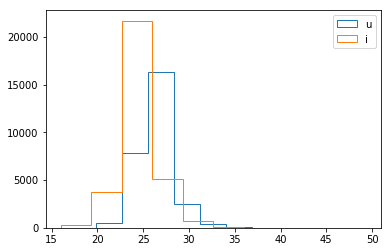

In [26]:

# Les histogrammes
# pour le filtre 'i'
mags = table[table['filter'] == 'i']['modelfit_CModel_mag']
# pour tout les filtres
filters = set(table['filter'])
mags = [table[table['filter'] == f]['modelfit_CModel_mag'] for f in filters]
fig, ax = plt.subplots()
for mag, filt in zip(mags, filters):
    mag = mag[np.isfinite(mag)]
    ax.hist(mag, label=filt, histtype='step')
ax.legend()

In [17]:
magi

nan
nan
nan
24.7124964208
nan
23.0810067463
nan
nan
nan
nan
nan
